In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

dir_path = r'train'
data_pattern = r'^.*_data\.csv$'
result_data = [f for f in os.listdir(dir_path) if re.match(data_pattern, f)]
events_pattern = r'^.*_events\.csv$'
result_events = [f for f in os.listdir(dir_path) if re.match(events_pattern, f)]

In [2]:
dir_path = r'train'
data_df_list = []
for file in result_data:
    df = pd.read_csv(os.path.join(dir_path, file))
    df.drop(['id'], axis=1, inplace=True) 
    data_df_list.append(df)

In [3]:
dir_path = r'train'
event_df_list = []
for file in result_events:
    df = pd.read_csv(os.path.join(dir_path, file))
    df.drop(['id'], axis=1, inplace=True) 
    event_df_list.append(df)

<AxesSubplot: >

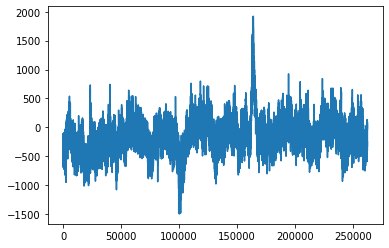

In [4]:
data_df_list[0]['F7'].plot()

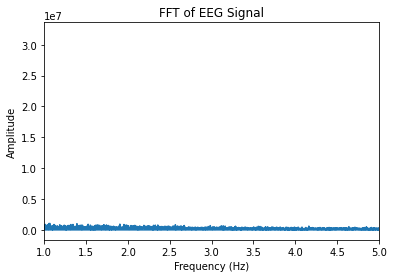

In [12]:
eeg_signal = data_df_list[0]['F7']
# 進行FFT計算
fft_result = np.fft.fft(eeg_signal)

# 計算對應的頻率軸
sampling_rate = 500  # 假設採樣頻率為200 Hz
freq_axis = np.fft.fftfreq(len(eeg_signal), 1/sampling_rate)

# 繪製FFT結果
plt.plot(freq_axis, np.abs(fft_result))
plt.xlim(1, 5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of EEG Signal')
plt.show()

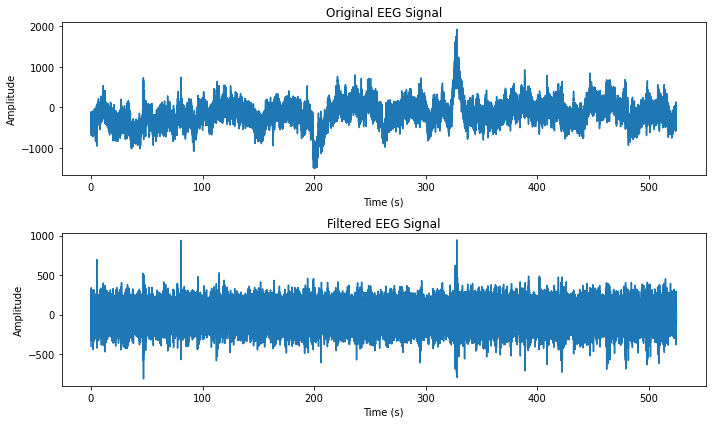

In [13]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 定義濾波器參數
cutoff_freq = 1  # 我們將保留高於10Hz的頻率成分
sampling_rate = 500  # 假設採樣頻率為200 Hz
order = 4  # 濾波器的階數

# 設計巴特沃斯高通濾波器
b, a = signal.butter(order, cutoff_freq, fs=sampling_rate, btype='high')

# 應用濾波器
filtered_signal = signal.lfilter(b, a, eeg_signal)

# 繪製濾波前後的訊號
time = np.arange(len(eeg_signal)) / sampling_rate
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, eeg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original EEG Signal')

plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered EEG Signal')

plt.tight_layout()
plt.show()

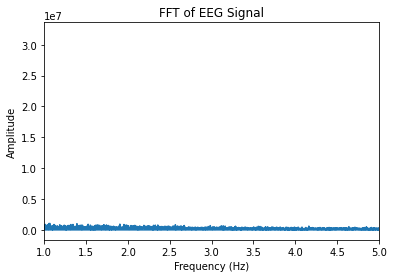

In [19]:
fft_result = np.fft.fft(eeg_signal)
freq_axis = np.fft.fftfreq(len(eeg_signal), 1/sampling_rate)

# 繪製FFT結果
plt.plot(freq_axis, np.abs(fft_result))
plt.xlim(1, 5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of EEG Signal')
plt.show()

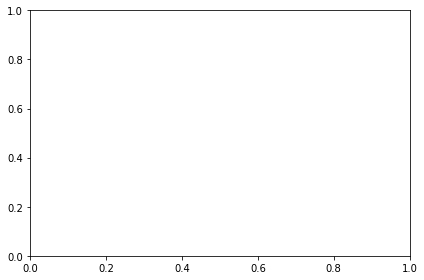

In [16]:

plt.tight_layout()
plt.show()